## Import Packages

In [135]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
df = pd.read_csv('data/DisneylandReviews.csv', encoding='ISO-8859-1')
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


## Data Cleaning

In [137]:
df.shape

(42656, 6)

In [138]:
df.columns

Index(['Review_ID', 'Rating', 'Year_Month', 'Reviewer_Location', 'Review_Text',
       'Branch'],
      dtype='object')

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [140]:
df.describe()

,Review_ID,Rating
count,4.265600e+04,42656.000000
mean,3.188553e+08,4.217695
std,1.657092e+08,1.063371
min,1.398724e+06,1.000000
25%,1.743274e+08,4.000000
50%,2.907583e+08,5.000000
75%,4.489579e+08,5.000000
max,6.708014e+08,5.000000


In [141]:
# Count all NaN in each column
#Your Code Here

for column in df.columns:
    print(f'{column}: {len(df[df[column].isna()].loc[:, column])}')

Review_ID: 0
Rating: 0
Year_Month: 0
Reviewer_Location: 0
Review_Text: 0
Branch: 0


### Find duplicate rows

In [142]:
#Find number of duplicate rows

print(len(df[df.duplicated()]))

12


In [143]:
#Remove duplicates

df = df.drop_duplicates()

## Changing data types

### Convert string to date

In [144]:
from datetime import datetime
from datetime import date

In [145]:
print(datetime.strptime(df.iloc[0]['Year_Month'], '%Y-%m'))

2019-04-01 00:00:00


In [146]:
df[df['Year_Month'] == 'missing']['Branch'].unique()

array(['Disneyland_HongKong', 'Disneyland_California', 'Disneyland_Paris'],
      dtype=object)

In [147]:
# Assign arbitrary date to rows with missing dates

import random

def SetDate(row):
    while True:
        try:
            if row == 'missing':
                rand_year = random.randint(2010, 2019)
                rand_month = random.randint(1, 12)
                row = str(rand_year) + '-' + str(rand_month)
                #print('m ' +row)

            break
        except ValueError:
            print(row)
            break
        

    return datetime.strptime(row, '%Y-%m')

In [148]:
# Change dates from string to datetime format

df['Year_Month'] = [SetDate(df.iloc[x]['Year_Month']) for x in range(0,len(df))]

In [149]:
# Check for rows with missing dates

df[df['Year_Month'] == 'missing']

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch


### Disneyland branch

In [150]:
df['Branch'].unique()

array(['Disneyland_HongKong', 'Disneyland_California', 'Disneyland_Paris'],
      dtype=object)

In [151]:
# Remove Disneyland_ from 'Branch' column

df['Branch'] = df['Branch'].str.replace('Disneyland_', '')
df['Branch']

0        HongKong
1        HongKong
2        HongKong
3        HongKong
4        HongKong
           ...   
42651       Paris
42652       Paris
42653       Paris
42654       Paris
42655       Paris
Name: Branch, Length: 42644, dtype: object

In [152]:
df['Branch'].unique()

array(['HongKong', 'California', 'Paris'], dtype=object)

### **Review dataframe data types**

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42644 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Review_ID          42644 non-null  int64         
 1   Rating             42644 non-null  int64         
 2   Year_Month         42644 non-null  datetime64[ns]
 3   Reviewer_Location  42644 non-null  object        
 4   Review_Text        42644 non-null  object        
 5   Branch             42644 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 2.3+ MB


In [154]:
df.shape

(42644, 6)

# <font color=green>Feature Enginearing<font>
    
### We have too many Features? Do you think you can make some high level features? 

In [155]:
# Add column 'Year'

df['Year'] = df['Year_Month'].dt.year

In [156]:
# Add column 'Month'

df['Month'] = df['Year_Month'].dt.month 

In [157]:
from countryinfo import countries

In [158]:
country_df = pd.DataFrame(countries)
country_df

,timezones,code,continent,name,capital
0,[Europe/Andorra],AD,Europe,Andorra,Andorra la Vella
1,[Asia/Kabul],AF,Asia,Afghanistan,Kabul
2,[America/Antigua],AG,North America,Antigua and Barbuda,St. John's
3,[Europe/Tirane],AL,Europe,Albania,Tirana
4,[Asia/Yerevan],AM,Asia,Armenia,Yerevan
...,...,...,...,...,...
188,[Asia/Colombo],LK,Asia,Sri Lanka,Sri Jayewardenepura Kotte
189,[Africa/Mbabane],SZ,Africa,Swaziland,Mbabane
190,[Europe/Zurich],CH,Europe,Switzerland,Bern
191,[Asia/Dubai],AE,Asia,United Arab Emirates,Abu Dhabi


In [159]:
country_df[country_df['name'] == 'China']

,timezones,code,continent,name,capital


In [160]:
import pycountry_convert as pc

def GetContinent(country):
    country = country.split('(')[0]
    if country[-1:] == ' ':
        country = country[:-1]
    #print(country)
    try:
        #country_code = pc.country_name_to_country_alpha2(country, cn_name_format='default')
        #continent_name = pc.country_alpha2_to_continent_code(country_code)
        continent_name = country_df[country_df['name'] == country]['continent']
    except KeyError:
        country_spl = country.split('(')
        print(country_spl[0])
        continent_name = country_df[country_df['name'] == country_spl[0]]['continent']
    
    if len(continent_name) == 0:
        continent_name = GetContinent_Pycountry(country)
        return continent_name
    else:
        return continent_name.values[0]

In [161]:
def GetContinent_Pycountry(country):

    try:
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format='default')
        continent_name = pc.country_alpha2_to_continent_code(country_code)

        if continent_name == 'AS':
            continent_name = 'Asia'
        if continent_name == 'EU':
            continent_name = 'Europe'
        if continent_name == 'NA':
            continent_name = 'North America'
        if continent_name == 'OC':
            continent_name = 'Oceania'
        if continent_name == 'SA':
            continent_name = 'South America'
        if continent_name == 'AF':
            continent_name = 'Africa'
    except KeyError:
        return 'None'

    return continent_name

In [162]:
print(GetContinent('Myanmar (Burma)'))

Asia


In [163]:
df['Continent'] = [GetContinent(df.iloc[x]['Reviewer_Location']) for x in range(0, len(df))]
df['Continent']

0              Oceania
1                 Asia
2                 Asia
3              Oceania
4               Europe
             ...      
42651           Europe
42652    North America
42653           Africa
42654    North America
42655           Europe
Name: Continent, Length: 42644, dtype: object

In [164]:
df['Continent'].unique()

array(['Oceania', 'Asia', 'Europe', 'North America', 'Africa',
       'South America', 'EU', 'None'], dtype=object)

In [165]:
df[df['Continent'] == 'None'].iloc[:]['Reviewer_Location'].unique()

array(['The Bahamas', 'Timor-Leste', 'U.S. Virgin Islands',
       'Caribbean Netherlands'], dtype=object)

## Exploratory Data Analysis

### Explore Relationship Between Categorical & Numerical Variable

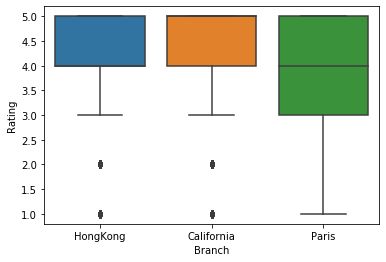

In [166]:
sns.boxplot(x='Branch', y='Rating', data=df)

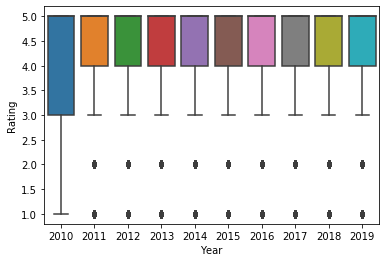

In [168]:
sns.boxplot(x='Year', y='Rating', data=df)

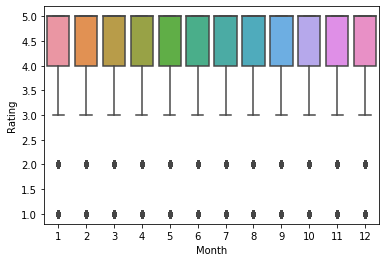

In [169]:
sns.boxplot(x='Month', y='Rating', data=df)

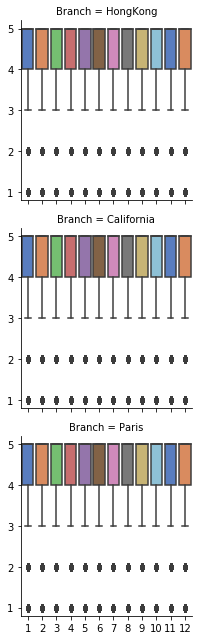

In [182]:
g = sns.FacetGrid(data=df, row='Branch')
g.map(sns.boxplot, x='Month', y='Rating', data=df, palette='muted')
#sns.boxplot(x='Continent', y='Rating', rows='Branch', data=df)
#plt.figure(figsize=(12,8))

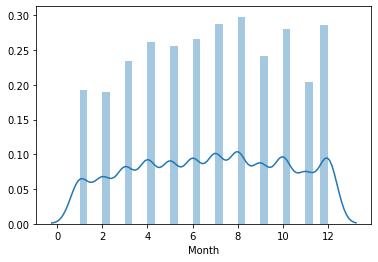

In [198]:
sns.distplot(df['Month'])

# <font color=green>Feature Selection<font>

### Check the correlation among the variables

In [199]:
df.corr()

,Review_ID,Rating,Year,Month
Review_ID,1.000000,0.006325,0.864362,-0.002022
Rating,0.006325,1.000000,-0.018938,0.011741
Year,0.864362,-0.018938,1.000000,-0.137225
Month,-0.002022,0.011741,-0.137225,1.000000


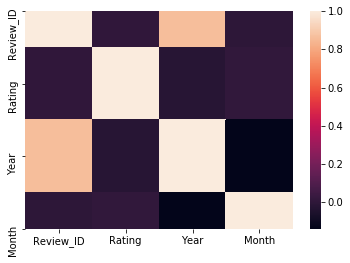

In [200]:
sns.heatmap(df.corr())

# <font color=green>Saving To CSV<font>

In [202]:
df.to_csv('data/new_DisneylandReviews.csv')